# Make mock IFU datacubes for stellar population and kinematic modelling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import popkinmocks as pkm

## Get SSP templates and an IFU object

In [2]:
ssps = pkm.model_grids.milesSSPs()
ssps.logarithmically_resample(dv=50.)
ssps.calculate_fourier_transform()
ssps.get_light_weights()
cube = pkm.ifu_cube.IFUCube(ssps=ssps, nx=25, ny=25, xrng=(-1,1), yrng=(-1,1))

## Create a disk component

We can next create a component of the mock galaxy. Currently, the only available component is a growing disk,

In [3]:
disk1 = pkm.components.growingDisk(cube=cube, rotation=0., center=(0,0))

/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:229: RuntimeWarning: divide by zero encountered in true_divide
  t = t_H - tt_dep * zz/(1. - self.ahat * zz**self.bhat)


### Star formation history

Specify the star formation history of the disk as a beta distribution with mean `0<phi<1` and concentration `lmd`,

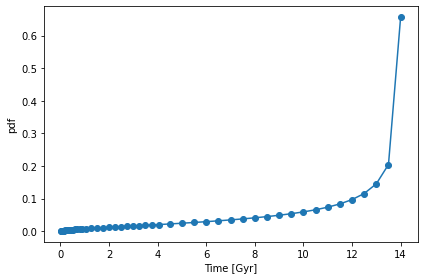

In [4]:
disk1.set_p_t(lmd=2., phi=0.8)
disk1.plot_sfh()

### Age-dependent spatial density

Set the age dependent spatial-density. Parameterised as an extent in x and y directions, and power law slope. These are all tuples of (end, start) values (i.e. at the end and start of disk growth), which are linearly interpolated between,

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x117403fa0>}


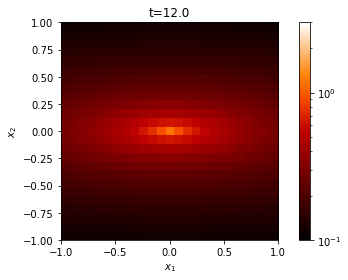

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x117403fa0>}


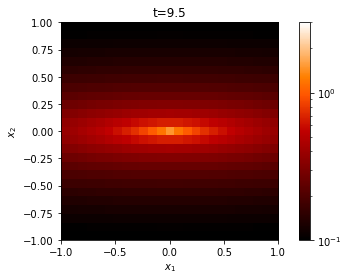

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x117403fa0>}


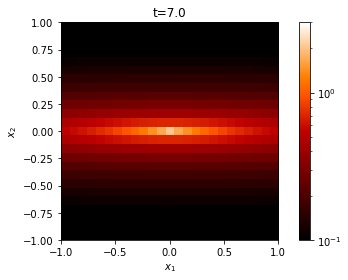

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x117403fa0>}


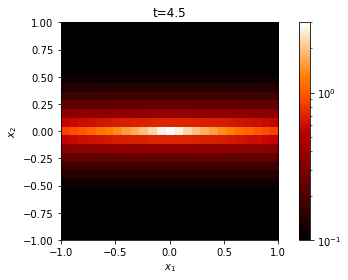

In [5]:
disk1.set_p_x_t(sig_x_lims=(0.5, 0.2),
                sig_y_lims=(0.03, 0.1),
                alpha_lims=(1.2, 0.8))
disk1.plot_density(show_every_nth_time=5)

### Spatially-dependent chemical enrichment

This is parameterised by depletion timescale `t_dep`. At ech position, an age-metallicity relation is evalueated using the model written down in equations 3-10 of [Zhu et al 2020](https://ui.adsabs.harvard.edu/abs/2020MNRAS.496.1579Z/abstract).

The `t_dep` map is elliptical, parameterised by x- and y- lengths, a power law slope `alpha` and an inner and outer value,

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536970>}


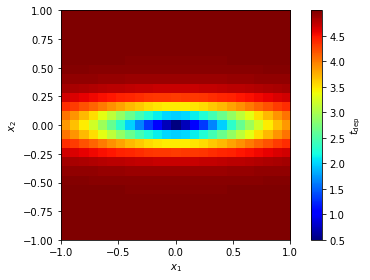

<AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>

In [6]:
disk1.set_t_dep(sig_x=0.5,
                sig_y=0.1,
                alpha=3.,
                t_dep_in=0.5,
                t_dep_out=5.)
disk1.set_p_z_tx()
disk1.plot_t_dep()

### Age- and Space- depentdent kinemtaics

For each stellar age, we produce map of mean velocities and velocity dispersions. For a single age, the LOSVD is Gaussian with this mean and dispersion. The combined LOSVD, for all ages, can be non-Gaussian. 

The mean maps take the form of rotating disks. Specified by and x and y extent, radius and value of maximum velocity, and the velocity at large distances `vinf`. Each parameter is a tuple of (end, start) values, which are linearly interpolated between

/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:367: RuntimeWarning: divide by zero encountered in true_divide
  th = np.arctan(self.xxp/sig_xp/self.yyp*sig_yp)
/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:367: RuntimeWarning: invalid value encountered in true_divide
  th = np.arctan(self.xxp/sig_xp/self.yyp*sig_yp)


{'extent': (-1, 1, -1, 1), 'vmin': -250.0, 'vmax': 250.0}


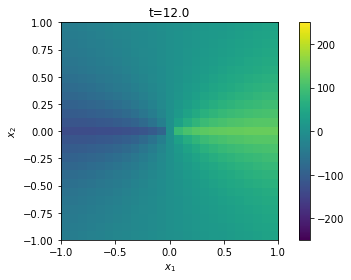

{'extent': (-1, 1, -1, 1), 'vmin': -250.0, 'vmax': 250.0}


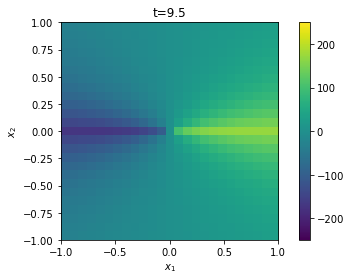

{'extent': (-1, 1, -1, 1), 'vmin': -250.0, 'vmax': 250.0}


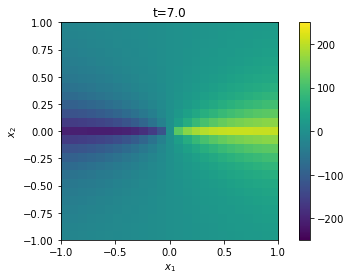

{'extent': (-1, 1, -1, 1), 'vmin': -250.0, 'vmax': 250.0}


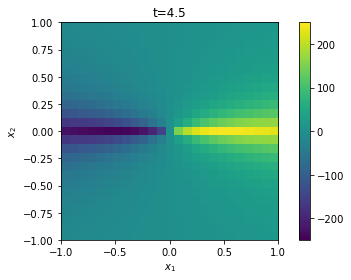

In [7]:
disk1.set_mu_v(sig_x_lims=(0.5, 0.1),
               sig_y_lims=(0.1, 0.1), 
               rmax_lims=(0.5, 1.1),
               vmax_lims=(250., 100.),
               vinf_lims=(60., 40.))
disk1.plot_mu_v(show_every_nth_time=5)

Dispersion maps given by power laws, parameterised with a slope and inner and outer values,

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536970>, 'vmin': 60.0, 'vmax': 150.0}


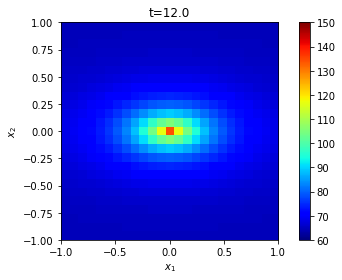

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536970>, 'vmin': 60.0, 'vmax': 150.0}


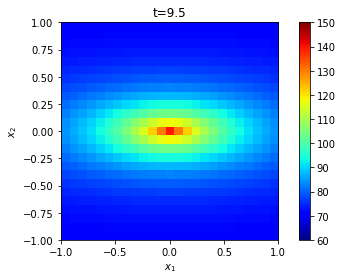

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536970>, 'vmin': 60.0, 'vmax': 150.0}


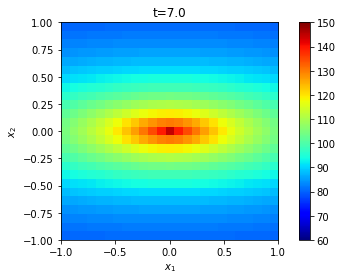

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536970>, 'vmin': 60.0, 'vmax': 150.0}


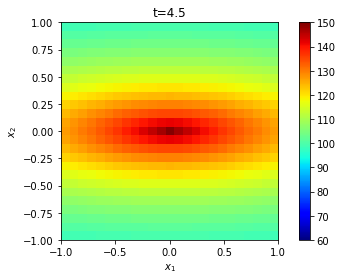

In [8]:
disk1.set_sig_v(sig_x_lims=(0.7, 0.1), 
                sig_y_lims=(0.2, 0.1), 
                alpha_lims=(1.2, 2.0),
                sig_v_in_lims=(150., 130.),
                sig_v_out_lims=(80., 60.))
disk1.plot_sig_v(show_every_nth_time=5)

### Evaluating densities

We can evaluate many interesting densties for this component. These are different projections of the joint density $p(t,v,x,z)$ over stellar age, LOS-velocity, 2D position, and metallicity.  
For example, if we want the spatially-dependent age and metallicity maps, $p(t,z|x)$, we can get this as follows:

In [9]:
p_tz_x = disk1.get_p_tz_x()

In [10]:
p_tz_x.shape

(53, 12, 25, 25)

These dimensions correspond to $(t,z,x_1,x_2)$ i.e. the order they appear in the function name. To plot the (t,z) distribution in a given pixel (i, j), would be as follows,

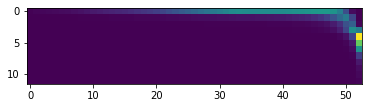

In [11]:
i, j = 12, 12

def orient_image(img):
    return np.flipud(img.T)

plt.imshow(orient_image(p_tz_x[:,:,i,j]))

By default, the methods to evaluate densities give densities without a volume-element factor. If instead we want weights with a volume-element factor, i.e. which sum to 1, we can specify this with `density=False`,

In [12]:
p_tz_x = disk1.get_p_tz_x(density=False)
print(np.sum(p_tz_x[:,:,i,j]))

1.0000000000000002


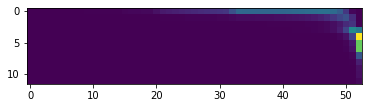

In [13]:
plt.imshow(orient_image(p_tz_x[:,:,i,j]))

Also by default, all distributions are mass-weighted. To get a light-weighted distribution we can add the `light_weighted=True` keyword,

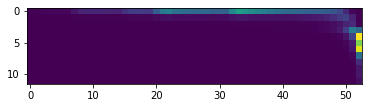

In [14]:
p_tz_x = disk1.get_p_tz_x(light_weighted=True, density=False)
plt.imshow(orient_image(p_tz_x[:,:,i,j]))

The full list of available methods to evaluate densities are `get_p_`+
- `t`
- `x_t`
- `tx`
- `z_tx`
- `txz`
- `x`
- `z`
- `tz_x`
- `tz`
- `v_tx`
- `tvxz`
- `v_x`
- `v`

These methods evaluate give the joint distribution of everything to the left of the underscore, conditioned on everthing to the right.

Lastly, we can evaluate the datacube contibution coming from this disk using the `evaluate_bar` method. At each position, each SSP is convolves with an age-dependent Gaussian LOSVD. These are combined according to the weights defined by the spatial density and chemical enrichments,

In [15]:
disk1.evaluate_ybar()
disk1.ybar.shape

(1944, 25, 25)

Dimensions are for wavelength and two spatial directions. Two plot the (noise-free) spectrum in a pixel,

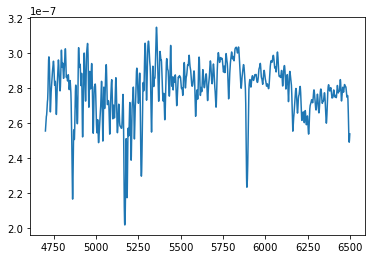

In [16]:
i,j = 12, 12
wavelength = np.exp(cube.ssps.w)
plt.plot(wavelength, disk1.ybar[:,i,j])

## Add a second disk

We can add a second compoent. We will make this younger, rounder, and counter-rotating to the first disk. (I wont show plots for `t_dep` and dispersion maps). 

/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:229: RuntimeWarning: divide by zero encountered in true_divide
  t = t_H - tt_dep * zz/(1. - self.ahat * zz**self.bhat)


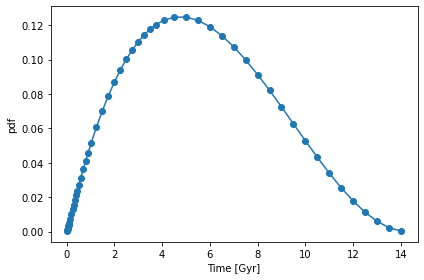

In [17]:
disk2 = pkm.components.growingDisk(cube=cube, rotation=0., center=(0,0))
disk2.set_p_t(lmd=5., phi=0.4)
disk2.plot_sfh()

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x114d98a90>}


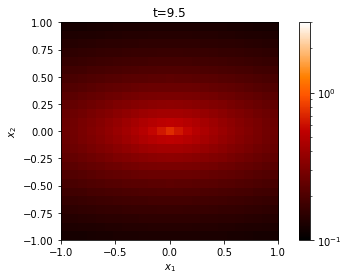

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x114d98a90>}


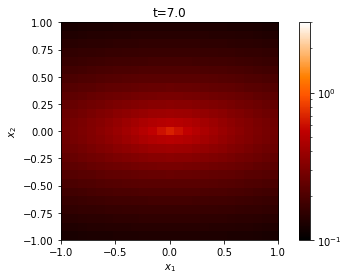

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x114d98a90>}


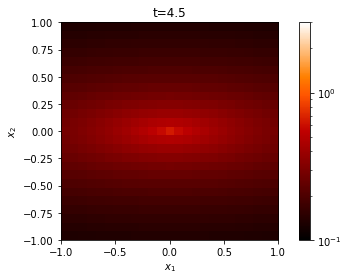

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x114d98a90>}


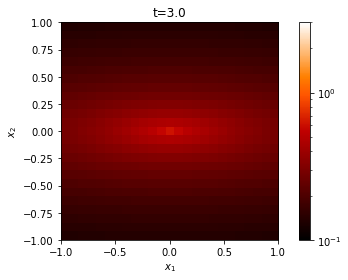

{'extent': (-1, 1, -1, 1), 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x111536790>, 'norm': <matplotlib.colors.LogNorm object at 0x114d98a90>}


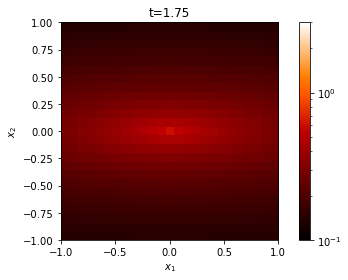

In [18]:
disk2.set_p_x_t(sig_x_lims=(0.7, 0.7),
              sig_y_lims=(0.2, 0.3),
              alpha_lims=(0.8, 1.2))
disk2.plot_density(show_every_nth_time=5)

In [19]:
disk2.set_t_dep(sig_x=0.8,
              sig_y=0.4,
              alpha=2.,
              t_dep_in=2.,
              t_dep_out=9.)
disk2.set_p_z_tx()

{'extent': (-1, 1, -1, 1), 'vmin': -180.0, 'vmax': 180.0}


/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:367: RuntimeWarning: divide by zero encountered in true_divide
  th = np.arctan(self.xxp/sig_xp/self.yyp*sig_yp)
/Users/pjethwa/miniconda3/envs/dcdirect/lib/python3.9/site-packages/popkinmocks-1.0.0-py3.9.egg/popkinmocks/components.py:367: RuntimeWarning: invalid value encountered in true_divide
  th = np.arctan(self.xxp/sig_xp/self.yyp*sig_yp)


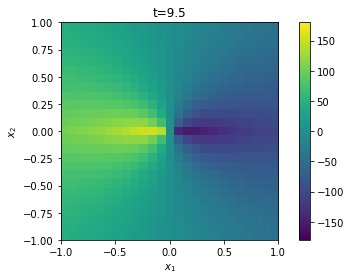

{'extent': (-1, 1, -1, 1), 'vmin': -180.0, 'vmax': 180.0}


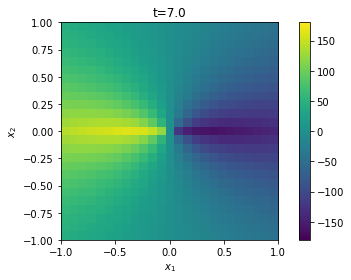

{'extent': (-1, 1, -1, 1), 'vmin': -180.0, 'vmax': 180.0}


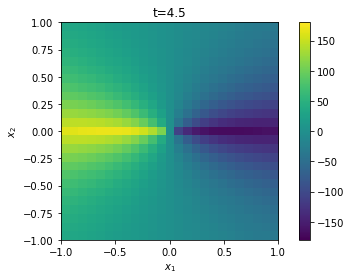

{'extent': (-1, 1, -1, 1), 'vmin': -180.0, 'vmax': 180.0}


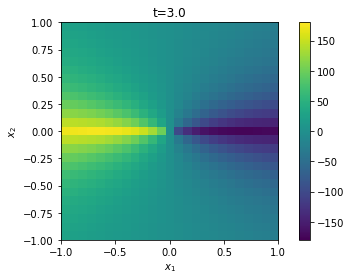

{'extent': (-1, 1, -1, 1), 'vmin': -180.0, 'vmax': 180.0}


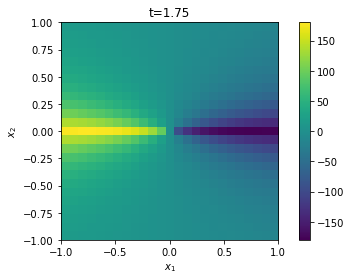

In [20]:
disk2.set_mu_v(sig_x_lims=(0.5, 0.5),
             sig_y_lims=(0.1, 0.5),
             rmax_lims=(0.8, 0.1),
             vmax_lims=(-180., -150.),
             vinf_lims=(-40., -90.))
disk2.plot_mu_v(show_every_nth_time=5)

In [21]:
disk2.set_sig_v(sig_x_lims=(0.7, 0.5),
                sig_y_lims=(0.5, 0.4),
                alpha_lims=(1.6, 1.8),
                sig_v_in_lims=(40., 100.),
                sig_v_out_lims=(20., 70.))

In [22]:
disk2.evaluate_ybar()

## Combine the components

We can combine the two disks to create a mixture model for the galaxy. We need a list of components and their (sum to 1) weights,

In [23]:
cmp_list = [disk1, disk2]
w = [0.8, 0.2]
cube.combine_components(cmp_list, w)

Just as for the individual compoennts, we can extract densities for the galaxy mixture model. Say we want to evaluate the light-weighted spatially dependent LOSVDs. Need to define an array of velocity bin-edges,

In [24]:
vedg = np.linspace(-750, 750, 100)
p_v_x = cube.get_p('v_x', v_edg=vedg, light_weighted=True)
p_v_x.shape

(2, 99, 25, 25)

Now, the dimensions correspond to (i) the 2 compoenents, (ii) velcoity, (iii/iv) 2D spatial position. To plot the LOSVD at a position, we would do the following,

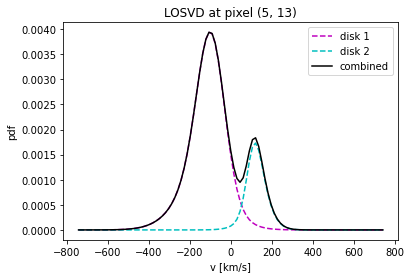

In [25]:
i, j = 5, 13

vcnt = (vedg[:-1]+vedg[1:])/2.
plt.plot(vcnt, p_v_x[0,:,i,j], '--m', label='disk 1')
plt.plot(vcnt, p_v_x[1,:,i,j], '--c', label='disk 2')
plt.plot(vcnt, np.sum(p_v_x[:,:,i,j], 0), '-k', label='combined')
plt.gca().set_title(f'LOSVD at pixel {i,j}')
plt.gca().set_xlabel('v [km/s]')
plt.gca().set_ylabel('pdf')
plt.gca().legend()